In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [77]:
stockTicker = yf.Ticker("^GSPC")
history = stockTicker.history(period='5y')

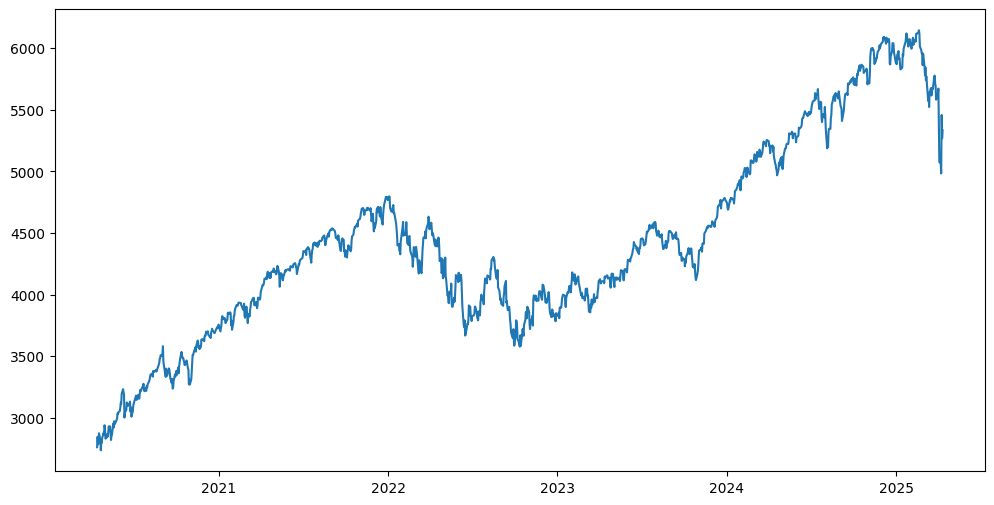

In [79]:
close_prices = history['Close']
plt.figure(figsize=(12, 6))
plt.plot(close_prices.index, close_prices, label="Historical S&P 500 Close")

In [80]:
model = auto_arima(close_prices, seasonal=False, trace=True)
print(model.summary())

C:\Users\anson\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anson\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anson\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anson\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

Performing stepwise search to minimize aic


C:\Users\anson\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anson\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anson\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13355.350, Time=2.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13355.132, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13355.651, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13355.671, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13355.322, Time=0.04 sec


C:\Users\anson\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\anson\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13356.928, Time=1.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 4.174 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6675.566
Date:                Fri, 11 Apr 2025   AIC                          13355.132
Time:                        13:01:16   BIC                          13365.404
Sample:                             0   HQIC                         13358.992
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0464      1.382      1.481      0.139      -0.662

In [ ]:
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    
    # predict
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# train and test sets
X = close_prices
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    yhat = arima_forecast(history)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

Date
2024-04-11 00:00:00-04:00    5199.060059
2024-04-12 00:00:00-04:00    5123.410156
2024-04-15 00:00:00-04:00    5061.819824
2024-04-16 00:00:00-04:00    5051.410156
2024-04-17 00:00:00-04:00    5022.209961
                                ...     
2025-04-07 00:00:00-04:00    5062.250000
2025-04-08 00:00:00-04:00    4982.770020
2025-04-09 00:00:00-04:00    5456.899902
2025-04-10 00:00:00-04:00    5268.049805
2025-04-11 00:00:00-04:00    5330.439941
Name: Close, Length: 252, dtype: float64


C:\Users\anson\AppData\Local\Temp\ipykernel_13920\1022268034.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


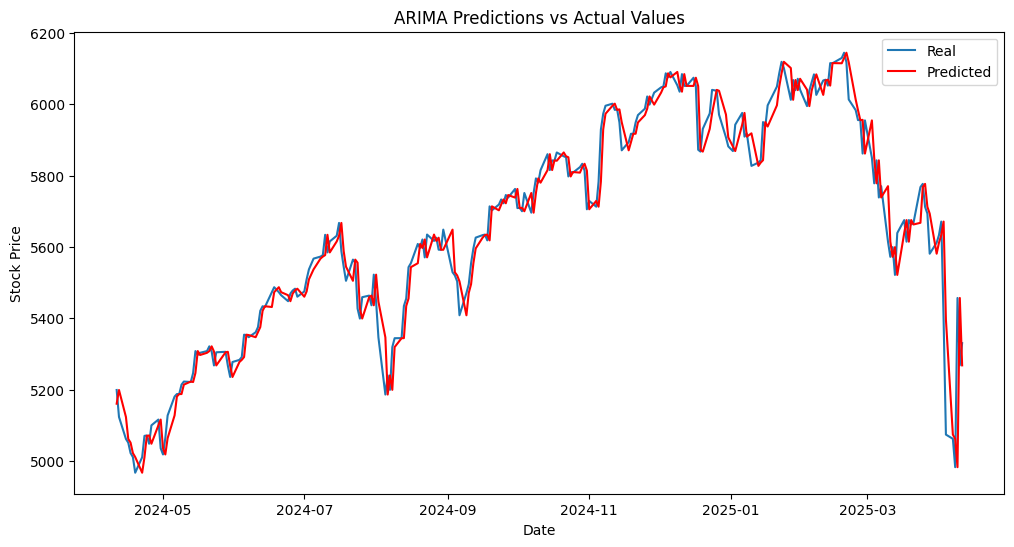

In [75]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(close_prices[size:].index, test, label='Real')
plt.plot(close_prices[size:].index, predictions, color='red', label='Predicted')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()